# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
%matplotlib inline
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

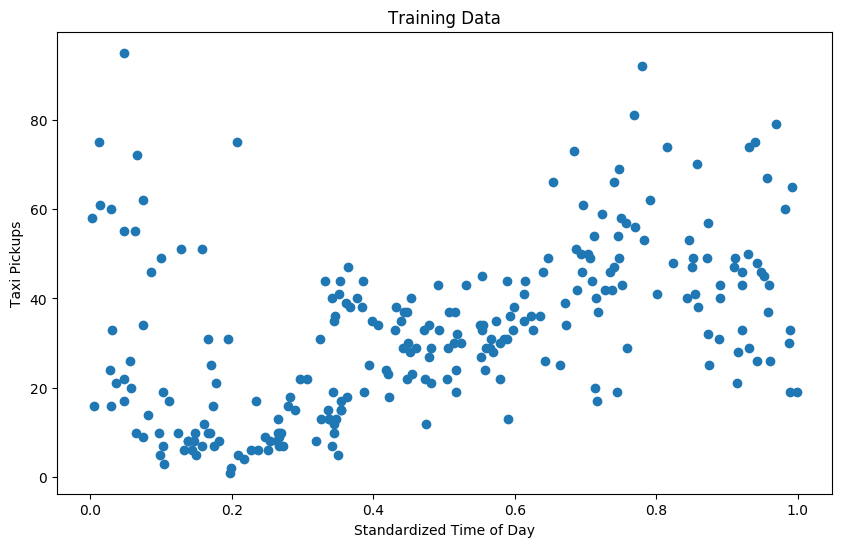

In [209]:
train = pd.read_csv('dataset_1_train.txt')
train['TimeMin'] = train['TimeMin']/1440
x_train = train['TimeMin'].values
y_train = train['PickupCount'].values
#test.plot(x=test['TimeMin'].values, y=test['PickupCount'].values, kind='scatter')
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(x_train,y_train, marker='o', linestyle='None')
plt.xlabel('Standardized Time of Day')
plt.ylabel('Taxi Pickups')
plt.title('Training Data')
plt.show()

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

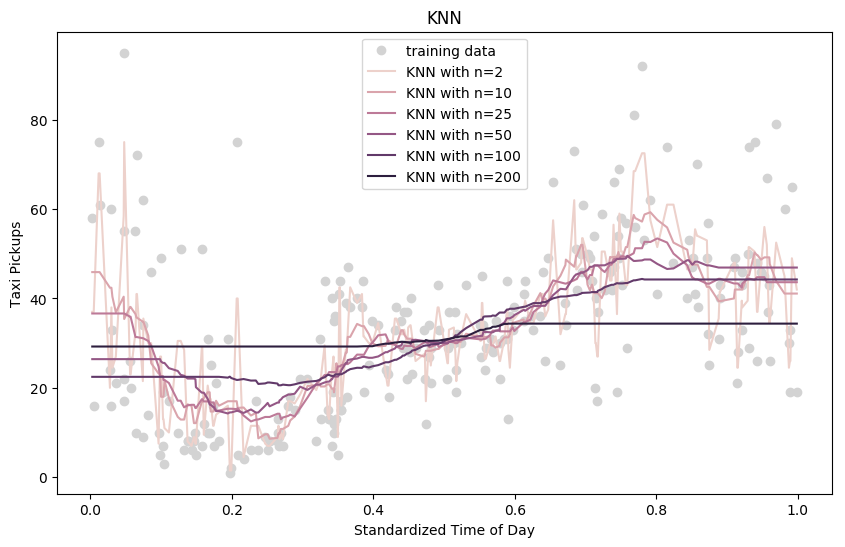

In [144]:
# Make x in a suitable form for KNN
X_train = [[x] for x in x_train]
sns.reset_defaults()
with sns.cubehelix_palette(6):
    plt.figure(figsize=(10, 6))
    plt.plot(x_train,y_train, marker='o', linestyle='None', color = 'lightgray', label = 'training data')
    for n in [ 2, 10, 25, 50, 100,200]:
        knn_model = KNeighborsRegressor(n_neighbors=n)
        # Fit model and sort by x's
        knn_model.fit(X_train, y_train) 
        model = pd.DataFrame.from_records(list(zip(x_train, knn_model.predict(X_train)))).sort_values(0)
        xNew = model[0]
        yNew = model[1]
        plt.plot(xNew, yNew, label = 'KNN with n=%d'%n)
    plt.xlabel('Standardized Time of Day')
    plt.ylabel('Taxi Pickups')
    plt.title('KNN')
    plt.legend()
    plt.show()

In [163]:
# load test data
train = pd.read_csv('dataset_1_test.txt')
train['TimeMin'] = train['TimeMin']/1440
x_test = test['TimeMin'].values
y_test = test['PickupCount'].values
X_test= [[x] for x in x_test]

r_train =[]
for n in range(1,200): 
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train, y_train) 
    r_train.append(r2_score(y_train, knn_model.predict(X_train)))
    
r_test =[]
for n in range(1,200): 
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train, y_train) 
    r_test.append(r2_score(y_test, knn_model.predict(X_test)))
    



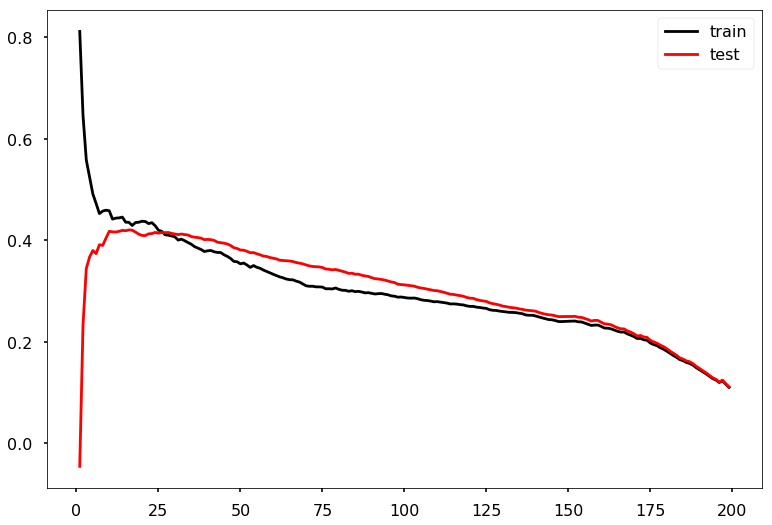

In [164]:
plt.plot(range(1,200),r_train, color = 'k', label = 'train')
plt.plot(range(1,200),r_test, color = 'red', label = 'test')
plt.legend()
plt.show()

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [210]:
X = sm.add_constant(x_train)
model = sm.OLS(X, y_train)
results = model.fit()
results.params

array([[ 0.02291186,  0.01286336]])

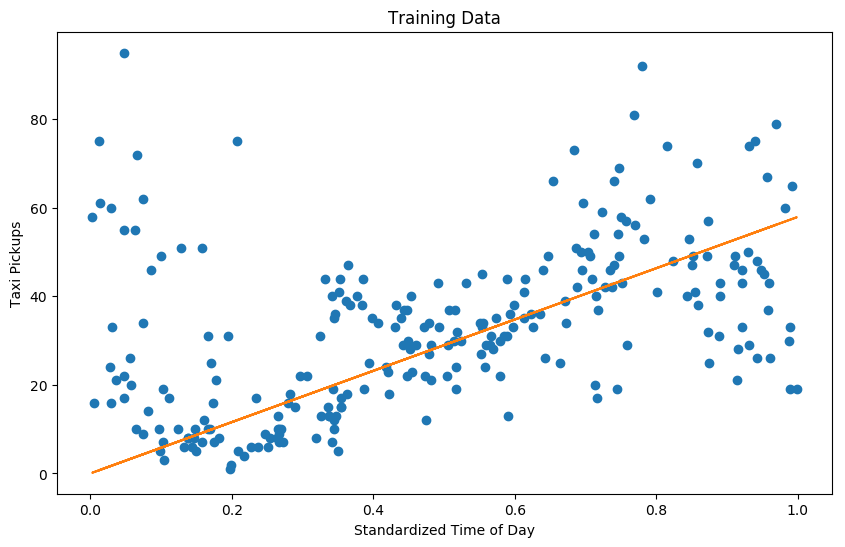

In [211]:
results = sm.OLS(endog=y_train, exog=x_train).fit()
results.summary()
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(x_train,y_train, marker='o', linestyle='None')
plt.xlabel('Standardized Time of Day')
plt.ylabel('Taxi Pickups')
plt.title('Training Data')
plt.plot(x_train, results.predict())
plt.show()


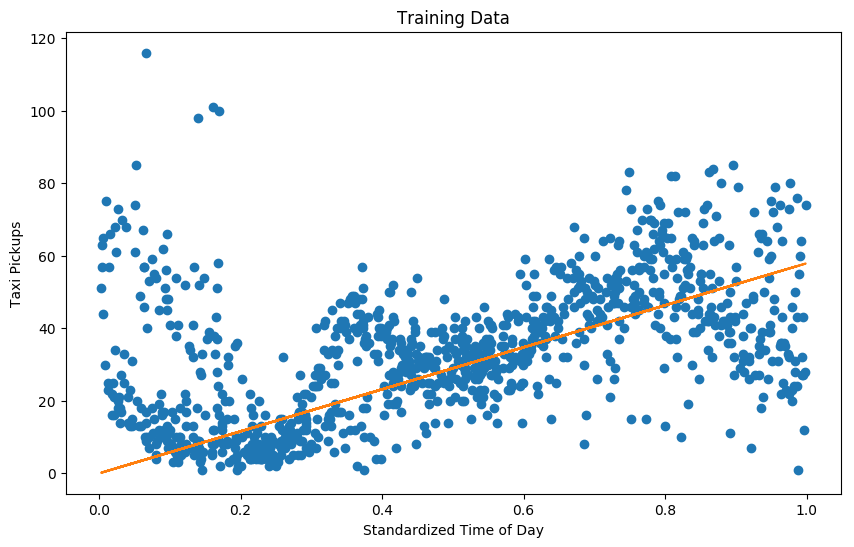

In [212]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(x_test,y_test, marker='o', linestyle='None')
plt.xlabel('Standardized Time of Day')
plt.ylabel('Taxi Pickups')
plt.title('Training Data')
plt.plot(x_test, results.predict(exog=x_test))
plt.show()

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     728.0
Date:                Sat, 23 Sep 2017   Prob (F-statistic):           7.15e-76
Time:                        16:52:57   Log-Likelihood:                -1092.1
No. Observations:                 250   AIC:                             2186.
Df Residuals:                     249   BIC:                             2190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            57.9262      2.147     26.981      0.000      53.698      62.155
==============================================================================
Omnibus:                       75.182   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.015
Skew:                           1.342   Prob(JB):                     5.00e-45
Kurtosis:                       6.519   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
train_r2 = r2_score(y_true=y_train, y_pred=results.predict())
test_r2 = r2_score(y_true=y_test, y_pred=results.predict(exog=x_test))
print(test_r2)
print(train_r2)

0.0622127585735
-0.0237999973024


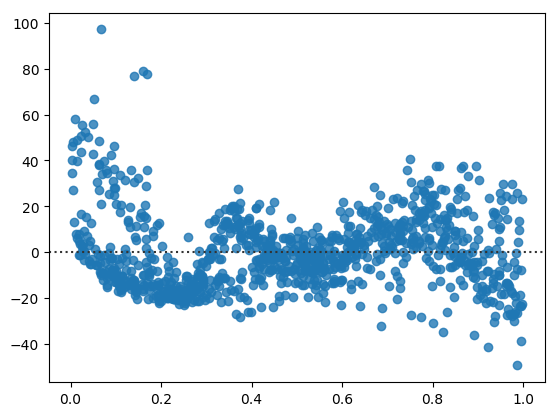

In [195]:
sns.residplot(x_test, y_test)

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



---- 
